In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

# Leap-frog (matrix form)

$$ \frac{d^{2}x}{dt^{2}} + \pi^{2}x = 0 $$

Con condiciones iniciales:

$$ x(0) = 1, \dot{x}(0) = 0 $$ 

$$ U = \begin{pmatrix} x \\ \dot{x} \end{pmatrix} $$ 

Tomemos la derivada de este vector y usemos la ecuacion diferencial:

$$ \frac{dU}{dt} = \begin{pmatrix} \dot{x} \\ \ddot{x} \end{pmatrix} =\begin{pmatrix} \dot{x} \\ -\pi^{2}x \end{pmatrix} =  \begin{pmatrix} 0 & 1 \\ -\pi^{2} & 0 \\ \end{pmatrix} \begin{pmatrix} x \\ \dot{x} \end{pmatrix} = JU = F(U)$$ 

Donde $J$ es la matriz simpléctica del sistema. 

Usemos el esquema de leapfrog para calcular la evolución del sistema $n \ge 1$.

$$ U^{n+1} = U^{n-1} + 2\Delta t F(U^{n})$$ 

Para poder arrancar el método necestiamos el esquema de un paso (Euler explícito).

$$ U^{1} = U^{0} + \Delta t F(U^{0})$$ 

dado que tenemos $ U^{0}$

$$ U^{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $$

In [12]:
N = 501
t = np.linspace(0.,10.,N)

In [13]:
def GetLeapFrog(r0,t):
    
    J = np.array([[0,1],[-np.pi**2,0]])
    print(J)
    
    def F(U):
        return np.dot(J,U)
    
    h = (t[-1]-t[0])/(len(t)-1)
    
    print(h)
    
    U = np.zeros((len(t),2))
    
    # Condicion inicial
    U[0] = r0
    
    for i in range(1,len(t)):
        if i == 1:
            U[i] = U[i-1] + h*F(U[i-1])
        else:
            U[i] = U[i-2] + 2*h*F(U[i-1])
    
    E = np.zeros((len(t),2))
    E[:,0] = 0.5*U[:,1]**2 
    E[:,1] = 0.5*np.pi**2*U[:,0]**2
    
    return U,E

In [35]:
r0 = np.array([1.0,0])
U,E = GetLeapFrog(r0,t)

[[ 0.         1.       ]
 [-9.8696044  0.       ]]
0.02


In [36]:
meanE = np.average(E[:,0]+E[:,1])
print(meanE)

4.944562231449453


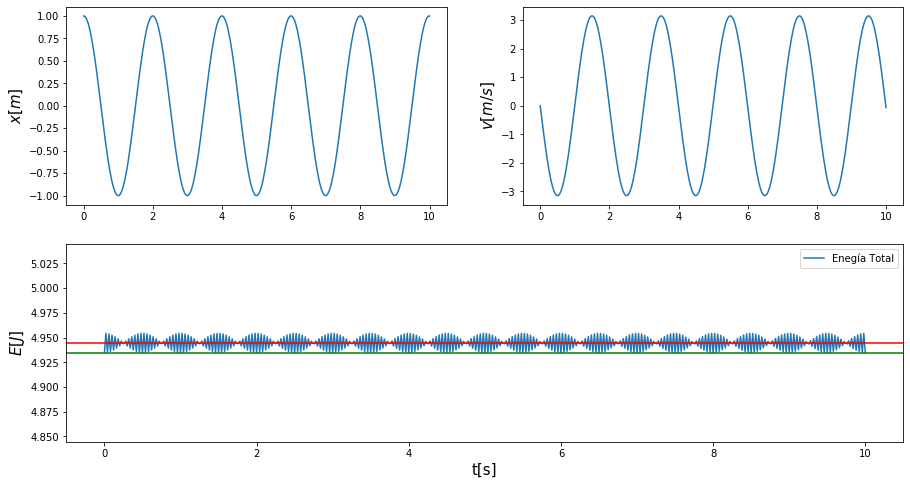

In [37]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1.plot(t,U[:,0])
ax1.set_ylabel(r'$x[m]$',fontsize=15)
ax2.plot(t,U[:,1])
ax2.set_ylabel(r'$v[m/s]$',fontsize=15)
ax3.plot(t,E[:,0]+E[:,1],label='Enegía Total')
ax3.axhline(y = meanE, color='r')
ax3.axhline(y = np.pi**2/2, color='g')
#ax3.plot(t,E[:,0],label='Enegía Cinética')
#ax3.plot(t,E[:,1],label='Enegía Potencial')
ax3.set_xlabel(r't[s]',fontsize=15)
ax3.set_ylabel(r'$E[J]$',fontsize=15)
ax3.set_ylim(meanE-0.1,meanE+0.1)
ax3.legend(loc=0)

$$ E_{t} = \frac{1}{2}kA^{2}$$ 

In [38]:
Et = np.pi**2/2
print(Et)

4.934802200544679


In [39]:
(meanE - Et)/Et * 100

0.19777957673149651

In [29]:
0.01**4

1e-08